In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the file into a pandas data frame - 5 points
df = pd.read_csv('adult.csv',na_values='?')
print(df.shape)

(32561, 15)


In [4]:
# Drop columns that have missing values - 5 points
df1 = df.dropna()
df1 = df1.drop(['native.country'], axis=1)
df1 = df1.drop(['education'], axis=1)
df1 = df1.drop(['fnlwgt'], axis=1)
print(df1.shape)

(30162, 12)


In [5]:
# Display the first six rows of the data frame after cleaning
df1.head(6)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,>50K


# One-Hot Encoding Data

In [6]:
# Based on: https://stackoverflow.com/questions/48170405/is-pd-get-dummies-one-hot-encoding
one_hot_data_df = pd.get_dummies(df1)
one_hot_data_df = one_hot_data_df.drop(['income_<=50K'], axis=1)
one_hot_data_df = one_hot_data_df.drop(['income_>50K'], axis=1)
one_hot_data_df.head(6)

# drop income
le = preprocessing.LabelEncoder()
le.fit(df1['income'])
df1['income_num'] = le.transform(df1['income'])
df1 = df1.drop(['income'], axis=1)

# Supervised Analysis

## Logistic Regression with Lasso (L1) Regularization.

In [9]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    # Fit the model on the training set.
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set.
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.758173
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759499
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759631
Accuracy on test data = 0.800809
Accuracy on training data = 0.759631
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


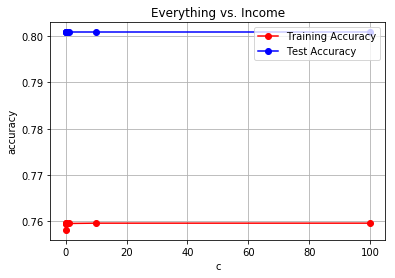

In [10]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
X = one_hot_data_df.iloc[:,0:46]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Everything vs. Income')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression with Ridge(L2) Regularization.

In [11]:
#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

X = one_hot_data_df.iloc[:,0:46]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.758173
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759499
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809
Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


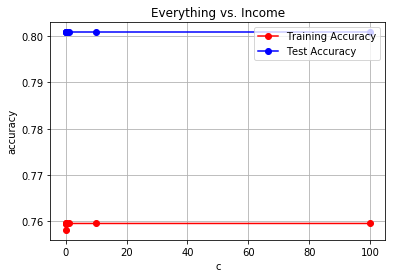

In [12]:
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Everything vs. Income')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression Using Polynomial Feature Transformation

In [13]:
poly = PolynomialFeatures(degree=2)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


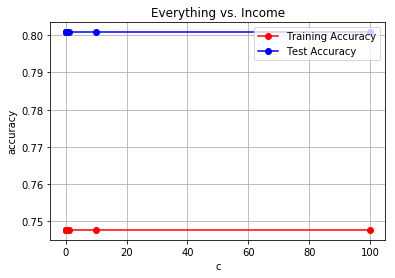

In [14]:
#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
X = one_hot_data_df.iloc[:,0:46]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
# Call the function logreg_model.
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Everything vs. Income')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')